Loading dataset from: data/raw/sensor_data_20251122.csv


,ph,turbidity,tds,status
0,7.213302,2.389356,725.681117,0
1,6.272011,2.340248,964.734111,0
2,7.525316,1.918743,378.702624,1
3,7.658395,3.367739,610.245830,1
4,5.634275,3.056661,942.012431,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ph         4750 non-null   float64
 1   turbidity  4750 non-null   float64
 2   tds        4750 non-null   float64
 3   status     5000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 156.4 KB

Summary Statistics:


,ph,turbidity,tds,status
count,4750.000000,4750.000000,4750.000000,5000.000000
mean,6.984642,3.083362,733.694217,0.264400
std,0.699982,1.672818,304.233832,0.441057
min,4.500000,0.302838,151.145654,0.000000
25%,6.515675,1.951659,521.392261,0.000000
50%,6.993305,2.688076,673.394610,0.000000
75%,7.437958,3.787078,879.895908,1.000000
max,9.417832,20.346563,3513.774286,1.000000



Missing Values:


ph           250
turbidity    250
tds          250
status         0
dtype: int64


Visualizing Distributions...


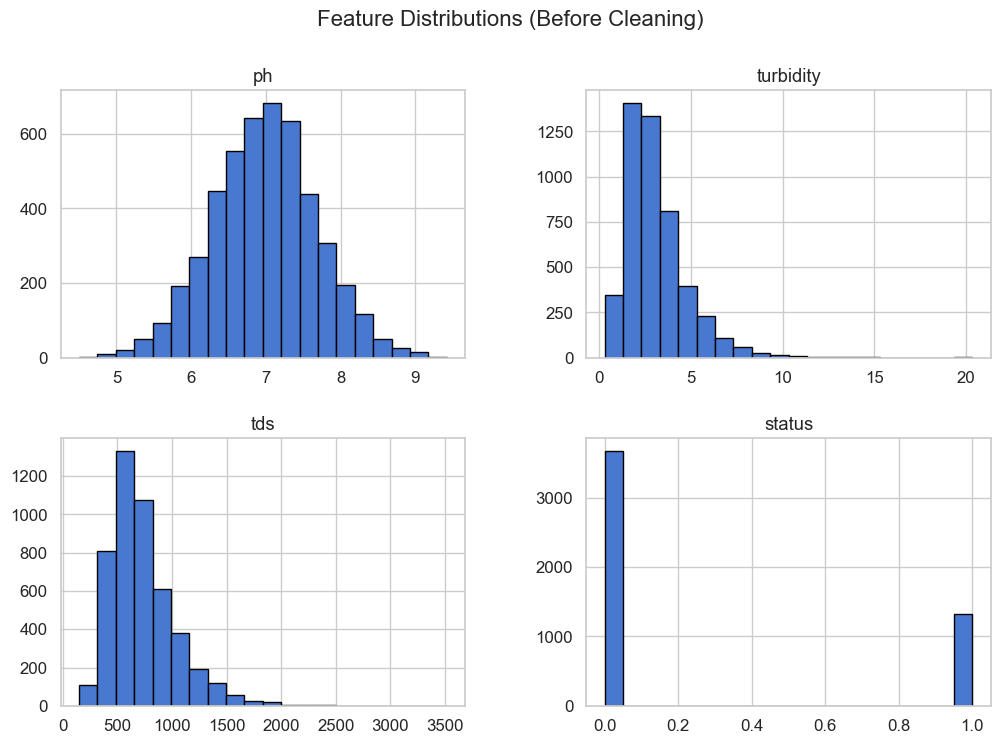


Detecting Outliers with Boxplots...


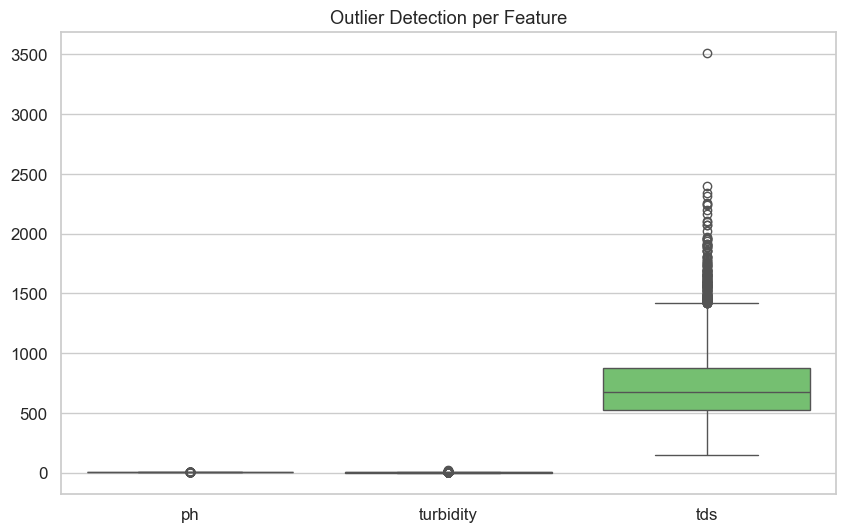


Correlation Heatmap...


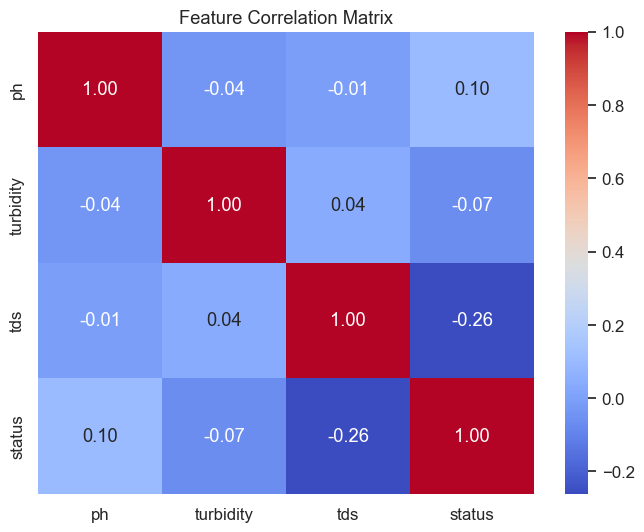


Label Distribution:


C:\Users\RAYMOND\AppData\Local\Temp\ipykernel_19488\2475872716.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=label_col, data=df, palette="Set2")


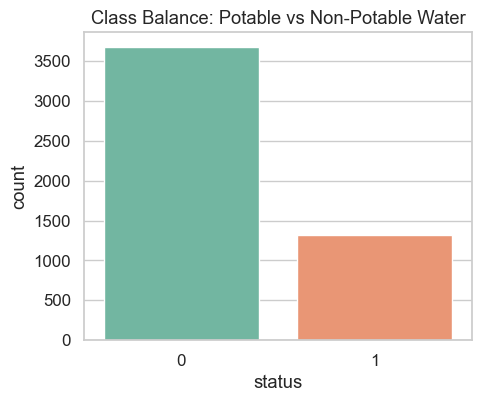


Feature Relationships (Pairplot)


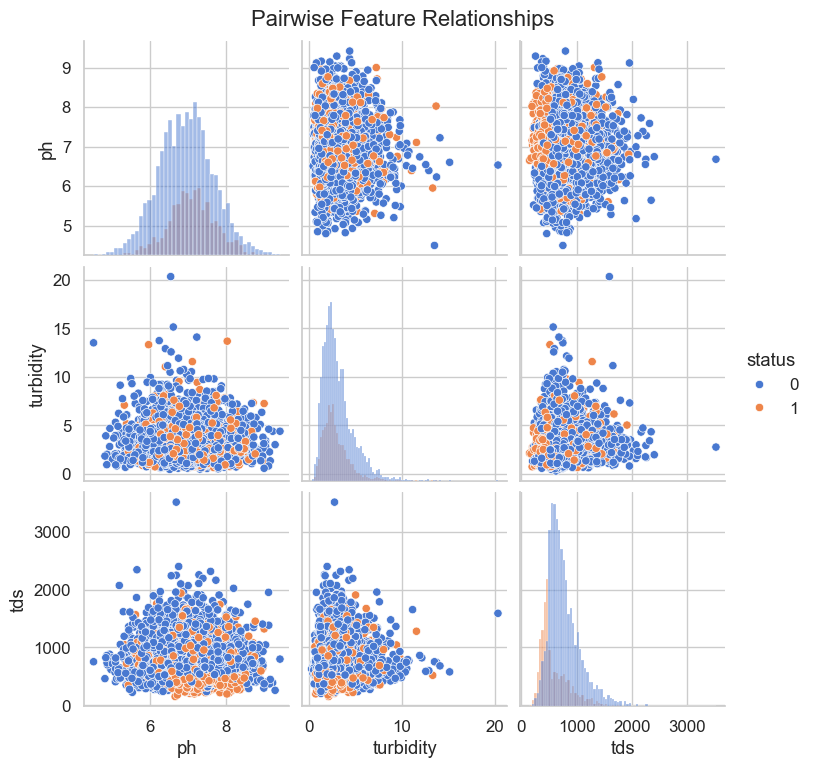


Data exploration completed! Review the charts above before cleaning.


In [1]:

import os
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml


sns.set(style="whitegrid", palette="muted", font_scale=1.1)


with open("../src/config/config.yaml", "r") as f:
    config = yaml.safe_load(f)

raw_path = config["data"]["raw_path"]
required_columns = [c.lower() for c in config["data"]["required_columns"]]

print(f"Loading dataset from: {raw_path}")


df = pd.read_csv(os.path.join("..", raw_path))
df.columns = [c.strip().lower() for c in df.columns]

display(df.head())


print("\nDataset Info:")
df.info()

print("\nSummary Statistics:")
display(df.describe())

print("\nMissing Values:")
display(df.isnull().sum())


print("\nVisualizing Distributions...")
df[required_columns].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions (Before Cleaning)", fontsize=16)
plt.show()


print("\nDetecting Outliers with Boxplots...")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[required_columns[:-1]])
plt.title("Outlier Detection per Feature")
plt.show()


print("\nCorrelation Heatmap...")
plt.figure(figsize=(8, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


label_col = required_columns[-1]
print("\nLabel Distribution:")
plt.figure(figsize=(5, 4))
sns.countplot(x=label_col, data=df, palette="Set2")
plt.title("Class Balance: Potable vs Non-Potable Water")
plt.show()


print("\nFeature Relationships (Pairplot)")
sns.pairplot(df[required_columns], hue=label_col, diag_kind="hist")
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

print("\nData exploration completed! Review the charts above before cleaning.")
